In [16]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import pathlib
path = pathlib.Path.cwd()

plt.rcParams["font.family"] = "serif"
matplotlib.rcParams.update({'font.size': 13})

In [21]:
def plot_roc2(X_test, y_test, rinv):
    test_predictions = model.predict(X_test).ravel()
    auc = metrics.roc_auc_score(y_test, test_predictions)    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, test_predictions)
    background_efficiency = fpr
    signal_efficiency = tpr
    background_rejection = 1. - background_efficiency
    
    roc_df = pd.DataFrame({"sig_eff": signal_efficiency, "bkg_eff": background_efficiency, "bkg_rej": background_rejection})
    roc_df.to_csv(f'roc_df/{rinv}.csv')
    # background_rejection = 1./fpr
    rinv_str = rinv.replace("p", ".")
    plt.plot(signal_efficiency, background_rejection,
         lw=2, label='$r_{inv} = %s$ (AUC $= %0.4f$)' %(rinv_str, auc))
#     plt.yscale("log")
    plt.xlabel('Signal efficiency $(\epsilon_S)$')
    plt.ylabel('Background rejection $(1 - \epsilon_B)$')
#     plt.xlim([0,1])
#     plt.ylim([0,1])
    plt.title("HL: " + ", ".join(observable_list))
    plt.legend(loc="lower left")
    plt.savefig(path / "figures" / "cnn_roc.png")
    plt.savefig(path / "figures" / "cnn_roc.pdf")
    return auc

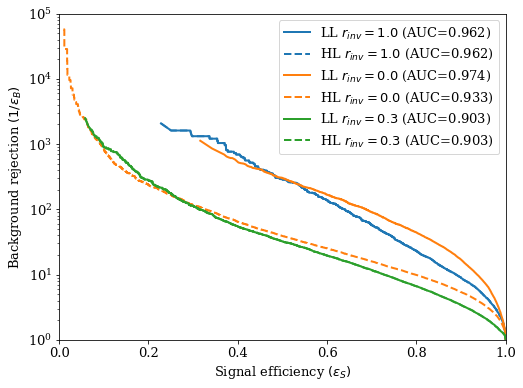

In [18]:
rinvs = ['1p0', '0p0', '0p3']
colors = ['tab:blue', 'tab:orange', 'tab:green']
plt.figure(figsize=(8, 6))
for ix, rinv in enumerate(rinvs):
    hl_file = path / 'HL-training' / 'roc_df' / f'{rinv}.csv' 
    ll_file = path / 'LL-training' / 'roc_df' / f'{rinv}.csv' 
    hl_auc = float(open(path / 'HL-training' / 'roc_df' / f'auc-{rinv}.txt', 'r').read())
    ll_auc = float(open(path / 'LL-training' / 'roc_df' / f'auc-{rinv}.txt', 'r').read())
    hl = pd.read_csv(hl_file, index_col=0)
    ll = pd.read_csv(ll_file, index_col=0)
    
    rinv_str = rinv.replace("p", ".")
    plt.plot(ll.sig_eff, 1. / ll.bkg_eff, lw=2, color=colors[ix], label='LL $r_{inv} = %s$ (AUC=%0.3f)' %(rinv_str, ll_auc))
    plt.plot(hl.sig_eff, 1. / hl.bkg_eff, linestyle='--', lw=2, color=colors[ix], label='HL $r_{inv} = %s$ (AUC=%0.3f)' %(rinv_str, hl_auc))
    plt.yscale('log')
    plt.xlim([0,1])
    plt.ylim([1, 1e5])
    plt.xlabel('Signal efficiency $(\epsilon_S)$')
    plt.ylabel('Background rejection $(1 / \epsilon_B)$')
    plt.legend(loc='upper right')

## Bootstrap Results

In [35]:
def plot_roc(bkg_eff, sig_eff, auc, rinv):    
    rinv_str = rinv.replace("p", ".")
    plt.plot(sig_eff, 1. / bkg_eff, lw=2, label='$r_{inv} = %s$ (AUC $= %0.4f$)' %(rinv_str, auc))
    plt.xlabel('Signal efficiency $(\epsilon_S)$')
    plt.ylabel('Background rejection $(1 - \epsilon_B)$')
    plt.legend(loc="lower left")
    plt.savefig(path / "figures" / "cnn_roc.png")
    plt.savefig(path / "figures" / "cnn_roc.pdf")
    return auc

In [41]:
rinvs = ['0p0']
colors = ['tab:blue', 'tab:orange', 'tab:green']
data_types = ['HL']

for rinv in rinvs:
    for data_type in data_types:
        auc_file = path / f'{data_type}-training' / 'bootstrap_results' / rinv / 'aucs.csv'
        aucs = pd.read_csv(auc_file).auc.values
        auc_avg = np.mean(aucs)
        runs = len(aucs)
        roc_path = path / f'{data_type}-training' / 'bootstrap_results' / rinv / 'roc'
        bkg_eff_avg, sig_eff_avg = 0, 0
        for roc_file in roc_path.glob('*'):
            roc_df = pd.read_csv(roc_file, index_col=0)
            bkg_eff_avg += roc_df.bkg_eff.values
            sig_eff_avg += roc_df.sig_eff.values
        plot_roc(bkg_eff_avg / runs, sig_eff_avg / runs, auc_avg, rinv)

ValueError: operands could not be broadcast together with shapes (36484,) (34676,) (36484,) 